# -----------------------------
# 1. Import library
# -----------------------------

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# -----------------------------
# 2. Load CSV
# -----------------------------

In [2]:
df = pd.read_csv("labels.csv")
IMG_PATH = "images/"

In [3]:
X, y = [], []

In [4]:
for _, row in df.iterrows():
    img = load_img(IMG_PATH + row["filename"], target_size=(128,128))
    img = img_to_array(img) / 255.0
    X.append(img)
    y.append([row["overripe mango"], row["ripe mango"], row["unripe mango"]])

In [5]:
X = np.array(X)
y = np.array(y)

In [6]:
print("รูป:", X.shape, "เลเบล:", y.shape)

รูป: (1060, 128, 128, 3) เลเบล: (1060, 3)


# -----------------------------
# 3. Train / Test split
# -----------------------------

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 4. สร้าง CNN
# -----------------------------

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax")
])

c:\users\koobo\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# -----------------------------
# 5. Train Model
# -----------------------------

In [11]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.5213 - loss: 1.7544 - val_accuracy: 1.0000 - val_loss: 0.0736
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.9693 - loss: 0.1166 - val_accuracy: 0.9906 - val_loss: 0.0429
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.9786 - loss: 0.0682 - val_accuracy: 0.9434 - val_loss: 0.1506
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9612 - loss: 0.1009 - val_accuracy: 0.9953 - val_loss: 0.0231
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.9930 - loss: 0.0369 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.9765 - loss: 0.0732 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9780 - loss: 0.0697 - val_accuracy: 0.9906 - val_loss: 0.0182
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9957 - loss: 0.0185 - val_accuracy: 1.

# -----------------------------
# 6. Plot Accuracy / Loss
# -----------------------------

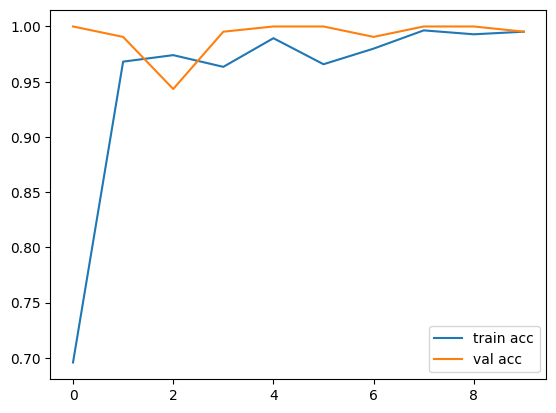

In [12]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# -----------------------------
# 7. Save model
# -----------------------------

In [13]:
model.save("mango_cnn.h5")
print("✅ โมเดลถูกบันทึกแล้ว mango_cnn.h5")

✅ โมเดลถูกบันทึกแล้ว mango_cnn.h5
